# DL(딥러닝)

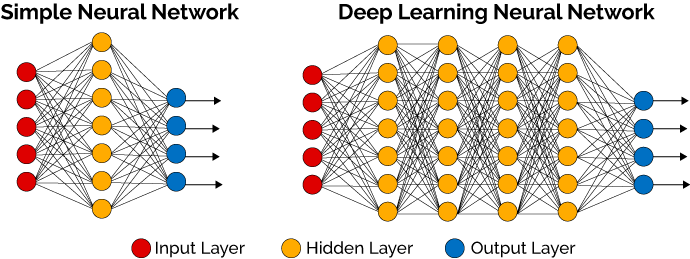

## 학습내용
- mnist
- fashion_mnist
- titanic

In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

## mnist

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(128, activation='relu'),
  Dropout(0.2),
  Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3008 - accuracy: 0.9129
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1455 - accuracy: 0.9566
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1088 - accuracy: 0.9674
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0896 - accuracy: 0.9724
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0761 - accuracy: 0.9767
313/313 - 0s - loss: 0.0719 - accuracy: 0.9785


[0.07189293950796127, 0.9785000085830688]

## fashion_mnist

In [6]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
# from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt


In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
len(train_labels)

60000

In [11]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
test_images.shape

(10000, 28, 28)

In [13]:
len(test_labels)

10000

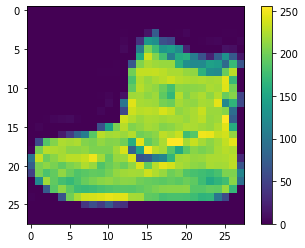

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
train_images = train_images / 255.0
test_images = test_images / 255.0

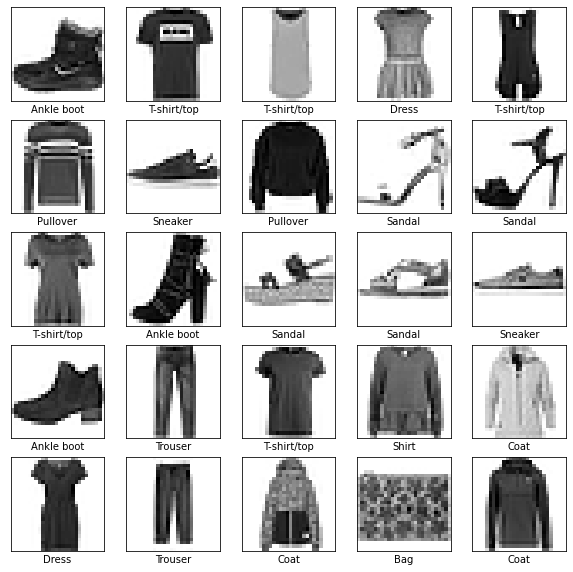

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [17]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5030 - accuracy: 0.8236
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3778 - accuracy: 0.8639
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3402 - accuracy: 0.8747
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3152 - accuracy: 0.8844
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2979 - accuracy: 0.8907


In [20]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.3450 - accuracy: 0.8740

테스트 정확도: 0.8740000128746033


## titanic

In [21]:
import pandas as pd
import numpy as np

In [22]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [23]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [24]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [25]:
def preprocessing(df):
  #범주형 데이터 처리 (원핫 인코딩 후 원본 컬럼은 삭제함)
  df_encoding = pd.get_dummies(df[['sex','embark_town', 'alone', 'class']])
  df = pd.concat([df, df_encoding], axis=1)
  df = df.drop('sex', axis=1) #Sex 삭제 
  df = df.drop('embark_town', axis=1) #embark_town 삭제
  df = df.drop('alone', axis=1) #alone 삭제 
  df = df.drop('class', axis=1) #class 삭제 
  df = df.drop('deck', axis=1) #deck 삭제


  df['age'] = np.log1p(df['age'])
  df['fare'] = np.log1p(df['fare'])
  return df

In [26]:
dftrain_pre = preprocessing(dftrain)

In [27]:
dftrain_pre.head()

,age,n_siblings_spouses,parch,fare,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_unknown,alone_n,alone_y,class_First,class_Second,class_Third
0,3.135494,1,0,2.110213,0,1,0,0,1,0,1,0,0,0,1
1,3.663562,1,0,4.280593,1,0,1,0,0,0,1,0,1,0,0
2,3.295837,0,0,2.188856,1,0,0,0,1,0,0,1,0,0,1
3,3.583519,1,0,3.990834,1,0,0,0,1,0,1,0,1,0,0
4,3.367296,0,0,2.246893,0,1,0,1,0,0,0,1,0,0,1


In [28]:
dftrain_pre.shape

(627, 15)

In [29]:
X_train = np.asarray(dftrain_pre)
y_train = np.asarray(y_train)

In [30]:
dfeval_pre = preprocessing(dfeval)
dfeval = np.asarray(dfeval_pre)
y_eval = np.asarray(y_eval)

In [31]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(15,)),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               4096      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 258       
Total params: 37,250
Trainable params: 37,250
Non-trainable params: 0
_________________________________________________________________


In [33]:
epochs=10
history = model.fit(X_train, y_train, validation_data=(dfeval, y_eval), epochs=epochs, batch_size=100)

Epoch 1/10
7/7 [==============================] - 0s 23ms/step - loss: 0.6183 - accuracy: 0.6475 - val_loss: 0.5561 - val_accuracy: 0.7273
Epoch 2/10
7/7 [==============================] - 0s 5ms/step - loss: 0.5270 - accuracy: 0.7512 - val_loss: 0.5087 - val_accuracy: 0.7386
Epoch 3/10
7/7 [==============================] - 0s 5ms/step - loss: 0.4678 - accuracy: 0.7815 - val_loss: 0.4776 - val_accuracy: 0.7841
Epoch 4/10
7/7 [==============================] - 0s 5ms/step - loss: 0.4356 - accuracy: 0.8070 - val_loss: 0.4607 - val_accuracy: 0.7917
Epoch 5/10
7/7 [==============================] - 0s 5ms/step - loss: 0.4219 - accuracy: 0.8182 - val_loss: 0.4563 - val_accuracy: 0.7992
Epoch 6/10
7/7 [==============================] - 0s 5ms/step - loss: 0.4130 - accuracy: 0.8150 - val_loss: 0.4662 - val_accuracy: 0.7879
Epoch 7/10
7/7 [==============================] - 0s 5ms/step - loss: 0.4164 - accuracy: 0.8150 - val_loss: 0.4548 - val_accuracy: 0.7955
Epoch 8/10
7/7 [=================

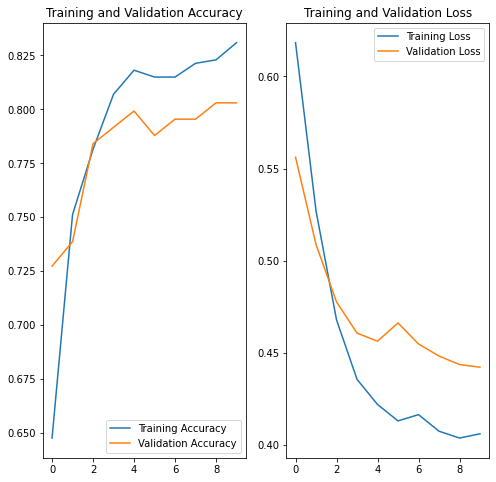

In [34]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## flowers


In [35]:
# https://www.tensorflow.org/tutorials/images/classification

In [36]:
!pip install -q tf-nightly

     |████████████████████████████████| 345.5MB 49kB/s 
     |████████████████████████████████| 8.9MB 48.2MB/s 
     |████████████████████████████████| 460kB 53.3MB/s 


In [37]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [38]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 6s 0us/step


In [39]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


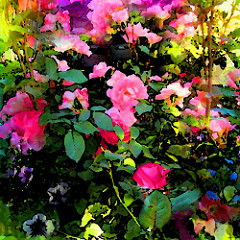

In [40]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

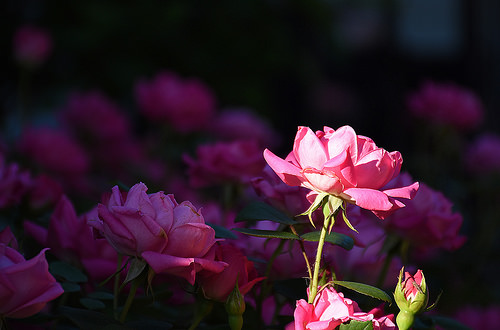

In [41]:
PIL.Image.open(str(roses[1]))

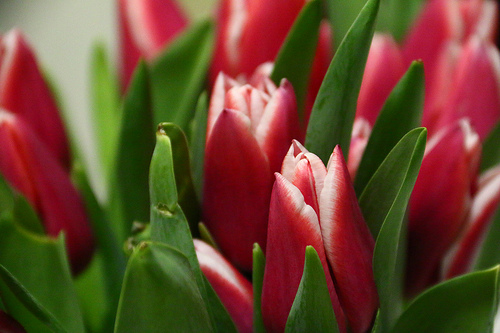

In [42]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

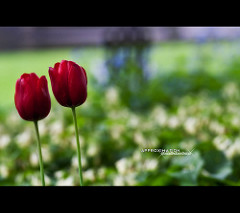

In [43]:
PIL.Image.open(str(tulips[1]))

In [44]:
batch_size = 32
img_height = 180
img_width = 180

In [45]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [46]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [47]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


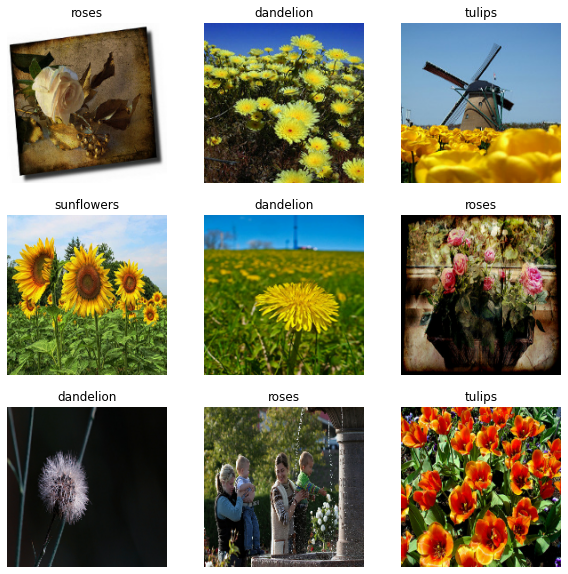

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [49]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [50]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [51]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [52]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


In [53]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [54]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)       

In [56]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 4s 40ms/step - loss: 1.3023 - accuracy: 0.4646 - val_loss: 1.0510 - val_accuracy: 0.5804
Epoch 2/10
92/92 [==============================] - 2s 21ms/step - loss: 0.9877 - accuracy: 0.6223 - val_loss: 0.9637 - val_accuracy: 0.6185
Epoch 3/10
92/92 [==============================] - 2s 21ms/step - loss: 0.7993 - accuracy: 0.6928 - val_loss: 0.9969 - val_accuracy: 0.6131
Epoch 4/10
92/92 [==============================] - 2s 21ms/step - loss: 0.6255 - accuracy: 0.7646 - val_loss: 0.9512 - val_accuracy: 0.6458
Epoch 5/10
92/92 [==============================] - 2s 21ms/step - loss: 0.4281 - accuracy: 0.8522 - val_loss: 0.9930 - val_accuracy: 0.6403
Epoch 6/10
92/92 [==============================] - 2s 21ms/step - loss: 0.2620 - accuracy: 0.9097 - val_loss: 1.1759 - val_accuracy: 0.6213
Epoch 7/10
92/92 [==============================] - 2s 21ms/step - loss: 0.1557 - accuracy: 0.9516 - val_loss: 1.4369 - val_accuracy: 0.6022
Epoch 8/10
92

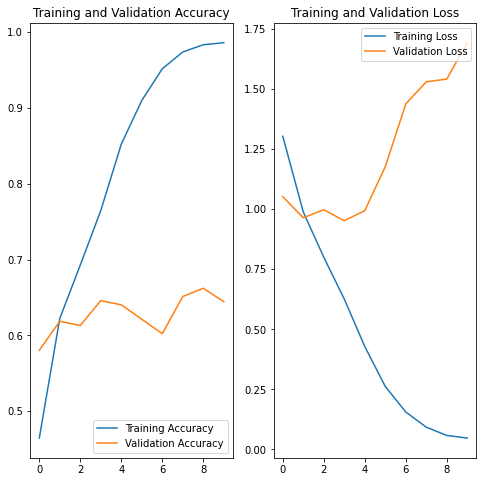

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()